<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 56px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">EDA</div>

***Notebook này được thiết kế để thực hiện các câu hỏi để khám phá dữ liệu***
<br>*Trong phần này, chúng ta sẽ đưa ra các câu hỏi để khám phá dữ liệu, sau đó trả lời và phân tích các câu hỏi này để tạo nên những lợi ích cho khách hàng.*

# **1 Import**

## **1.1 Thư viện**


*Khai báo các thư viện sử dụng trong notebook*


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")

## **1.2 Dữ liệu**

*Đọc file dữ liệu*

In [76]:
file_path = "data/cleaned_data_DS_Salary.csv"
cleaned_df = pd.read_csv(file_path)

*Nhìn 5 dòng đầu tiên của dữ liệu để có cái nhìn tổng quan nhất*

In [77]:
cleaned_df.head(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Same City
0,Data Scientist,53-91,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,0
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,data scientist,na,M,0
2,Data Scientist,80-90,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,data scientist,na,M,1
3,Data Scientist,56-97,3.8,PNNL,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,data scientist,na,na,1
4,Data Scientist,86-143,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,data scientist,na,na,1


In [78]:
cleaned_df['Size'].to_csv('data/size.csv', index=False)

Kiểm tra kiểu dữ liệu của các cột.

In [79]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Rating              742 non-null    float64
 3   Company Name        742 non-null    object 
 4   Location            742 non-null    object 
 5   Headquarters        742 non-null    object 
 6   Size                742 non-null    object 
 7   Founded             742 non-null    int64  
 8   Type of ownership   742 non-null    object 
 9   Industry            742 non-null    object 
 10  Sector              742 non-null    object 
 11  Revenue             742 non-null    object 
 12  Competitors         742 non-null    object 
 13  Hourly              742 non-null    int64  
 14  Employer provided   742 non-null    int64  
 15  Lower Salary        742 non-null    int64  
 16  Upper Sa

In [80]:
cleaned_df.to_excel("data/cleaned_data_DS_Salary.xlsx", index=False)

# **2 Khám phá dữ liệu**

## **2.1 Giá trị được phân phối như thế nào?**

### **2.1.1 Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bổ như thế nào?**

Đối với các cột có kiểu dữ liệu số, ta sẽ tính:

- The mean
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range và IQR 

In [81]:
# Tạo dataframe để copy cleaned_df
num_col_df = cleaned_df.copy()

# Lọc ra các cột số
num_col_df = num_col_df.select_dtypes(include=['number'])

df_analyze = num_col_df.describe()
# Tính IQR
Q1 = num_col_df.quantile(0.25)
Q3 = num_col_df.quantile(0.75)
IQR = Q3 - Q1

# Thêm IQR vào cuối df_analyze
df_analyze.loc['IQR'] = IQR

df_analyze

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Same City
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,98.448327,50.322102,0.528302,0.225067,...,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868,0.557951
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,32.364311,54.026459,0.499535,0.417908,...,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150,0.496965
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,25.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,75.500000,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,98.500000,28.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,120.000000,63.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,177.000000,280.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IQR,0.700000,68.000000,0.000000,0.000000,39.000000,59.000000,44.500000,48.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


**Nhận xét**

### **2.1.2 Với mỗi cột có kiểu dữ liệu không phải số, các giá trị được phân bổ như thế nào?**

Đối với các cột có kiểu dữ liệu không phải số, ta sẽ tính:

- Số lượng giá trị
- Tỷ lệ phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỷ lệ phần trăm giảm dần

In [82]:
pd.set_option('display.max_colwidth', 200)

cat_col_info_df = cleaned_df.select_dtypes(exclude=['number'])
cat_col_info_df

# Hàm để tính số lượng giá trị duy nhất
def num_values(x):
    return len(x.dropna().unique())

# Hàm để tính các tỷ lệ giá trị
def value_ratios(x):
    # Tạo một Series với tỷ lệ xuất hiện của từng giá trị
    value_counts = x.value_counts(normalize=True)

    # Sắp xếp theo tỷ lệ giảm dần
    sorted_value_counts = value_counts.sort_values(ascending=False)
    
    # Lưu vào từ điển
    value_ratios = {value: round(percentage * 100, 1) for value, percentage in sorted_value_counts.items()}
    
    return value_ratios

# Gán DataFrame mới để lưu kết quả
cat_col_info_df = cat_col_info_df.agg([num_values, value_ratios])
cat_col_info_df

,Job Title,Salary Estimate,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,company_txt,Job Location,job_title_sim,seniority_by_title,Degree
num_values,264,416,343,200,198,8,9,60,25,13,128,343,37,10,3,3
value_ratios,"{'Data Scientist': 17.7, 'Data Engineer': 7.1, 'Senior Data Scientist': 4.6, 'Data Analyst': 2.0, 'Senior Data Engineer': 1.9, 'Senior Data Analyst': 1.6, 'Lead Data Scientist': 1.1, 'Marketing Da...","{'49-113 ': 0.8, '54-115 ': 0.8, '21-34': 0.8, '86-143 ': 0.8, '74-124 ': 0.7, '76-142 ': 0.7, '107-173 ': 0.7, '81-167 ': 0.7, '44-78 ': 0.5, '44-86 ': 0.5, '35-62 ': 0.5, '64-106 ': 0.5, '39-66 ...","{'MassMutual': 1.9, 'Takeda Pharmaceuticals': 1.9, 'Reynolds American': 1.9, 'Software Engineering Institute': 1.5, 'PNNL': 1.3, 'Liberty Mutual Insurance': 1.3, 'AstraZeneca': 1.2, 'MITRE': 1.1, ...","{'New York, NY': 7.4, 'San Francisco, CA': 6.6, 'Cambridge, MA': 6.3, 'Chicago, IL': 4.3, 'Boston, MA': 3.1, 'San Jose, CA': 1.8, 'Pittsburgh, PA': 1.6, 'Washington, DC': 1.5, 'Rockville, MD': 1.5...","{'New York, NY': 7.0, 'San Francisco, CA': 5.7, 'Chicago, IL': 4.0, 'Cambridge, MA': 2.7, 'Springfield, MA': 1.9, 'Boston, MA': 1.9, 'Winston-Salem, NC': 1.9, 'OSAKA, Japan': 1.9, 'Richland, WA': ...","{'1001 - 5000 ': 20.2, '501 - 1000 ': 18.1, '10000+ ': 17.5, '201 - 500 ': 15.8, '51 - 200 ': 12.7, '5001 - 10000 ': 10.2, '1 - 50 ': 4.2, 'unknown': 1.3}","{'Company - Private': 55.3, 'Company - Public': 26.0, 'Nonprofit Organization': 7.4, 'Subsidiary or Business Segment': 4.6, 'Government': 2.0, 'Hospital': 2.0, 'College / University': 1.8, 'Other ...","{'Biotech & Pharmaceuticals': 15.1, 'Insurance Carriers': 8.5, 'Computer Hardware & Software': 8.0, 'IT Services': 6.7, 'Health Care Services & Hospitals': 6.6, 'Enterprise Software & Network Solu...","{'Information Technology': 24.3, 'Biotech & Pharmaceuticals': 15.1, 'Business Services': 13.1, 'Insurance': 9.3, 'Health Care': 6.6, 'Finance': 5.7, 'Manufacturing': 4.6, 'Aerospace & Defense': 3....","{'Unknown / Non-Applicable': 27.5, '$10+ billion (USD)': 16.7, '$100 to $500 million (USD)': 12.3, '$1 to $2 billion (USD)': 8.1, '$500 million to $1 billion (USD)': 7.7, '$50 to $100 million (USD...","{'-1': 62.0, 'Novartis, Baxter, Pfizer': 1.9, 'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory': 1.6, 'Travelers, Allstate, State Farm': 1.3, 'Roche, G...","{'MassMutual': 1.9, 'Takeda Pharmaceuticals': 1.9, 'Reynolds American': 1.9, 'Software Engineering Institute': 1.5, 'PNNL': 1.3, 'Liberty Mutual Insurance': 1.3, 'AstraZeneca': 1.2, 'MITRE': 1.1, ...","{'CA': 20.5, 'MA': 13.9, 'NY': 9.7, 'VA': 5.5, 'IL': 5.4, 'MD': 4.7, 'PA': 4.4, 'TX': 3.8, 'WA': 2.8, 'NC': 2.8, 'NJ': 2.3, 'FL': 2.2, 'OH': 1.9, 'TN': 1.8, 'DC': 1.5, 'CO': 1.5, 'UT': 1.3, 'IN': ...","{'data scientist': 42.2, 'other scientist': 19.3, 'data engineer': 16.0, 'analyst': 13.6, 'machine learning engineer': 3.0, 'Data scientist project manager': 2.2, 'na': 1.3, 'data analitics': 1.1,...","{'na': 69.9, 'sr': 29.6, 'jr': 0.4}","{'na': 51.6, 'M': 34.0, 'P': 14.4}"


## **2.2 Mối tương quan giữa các cột số**

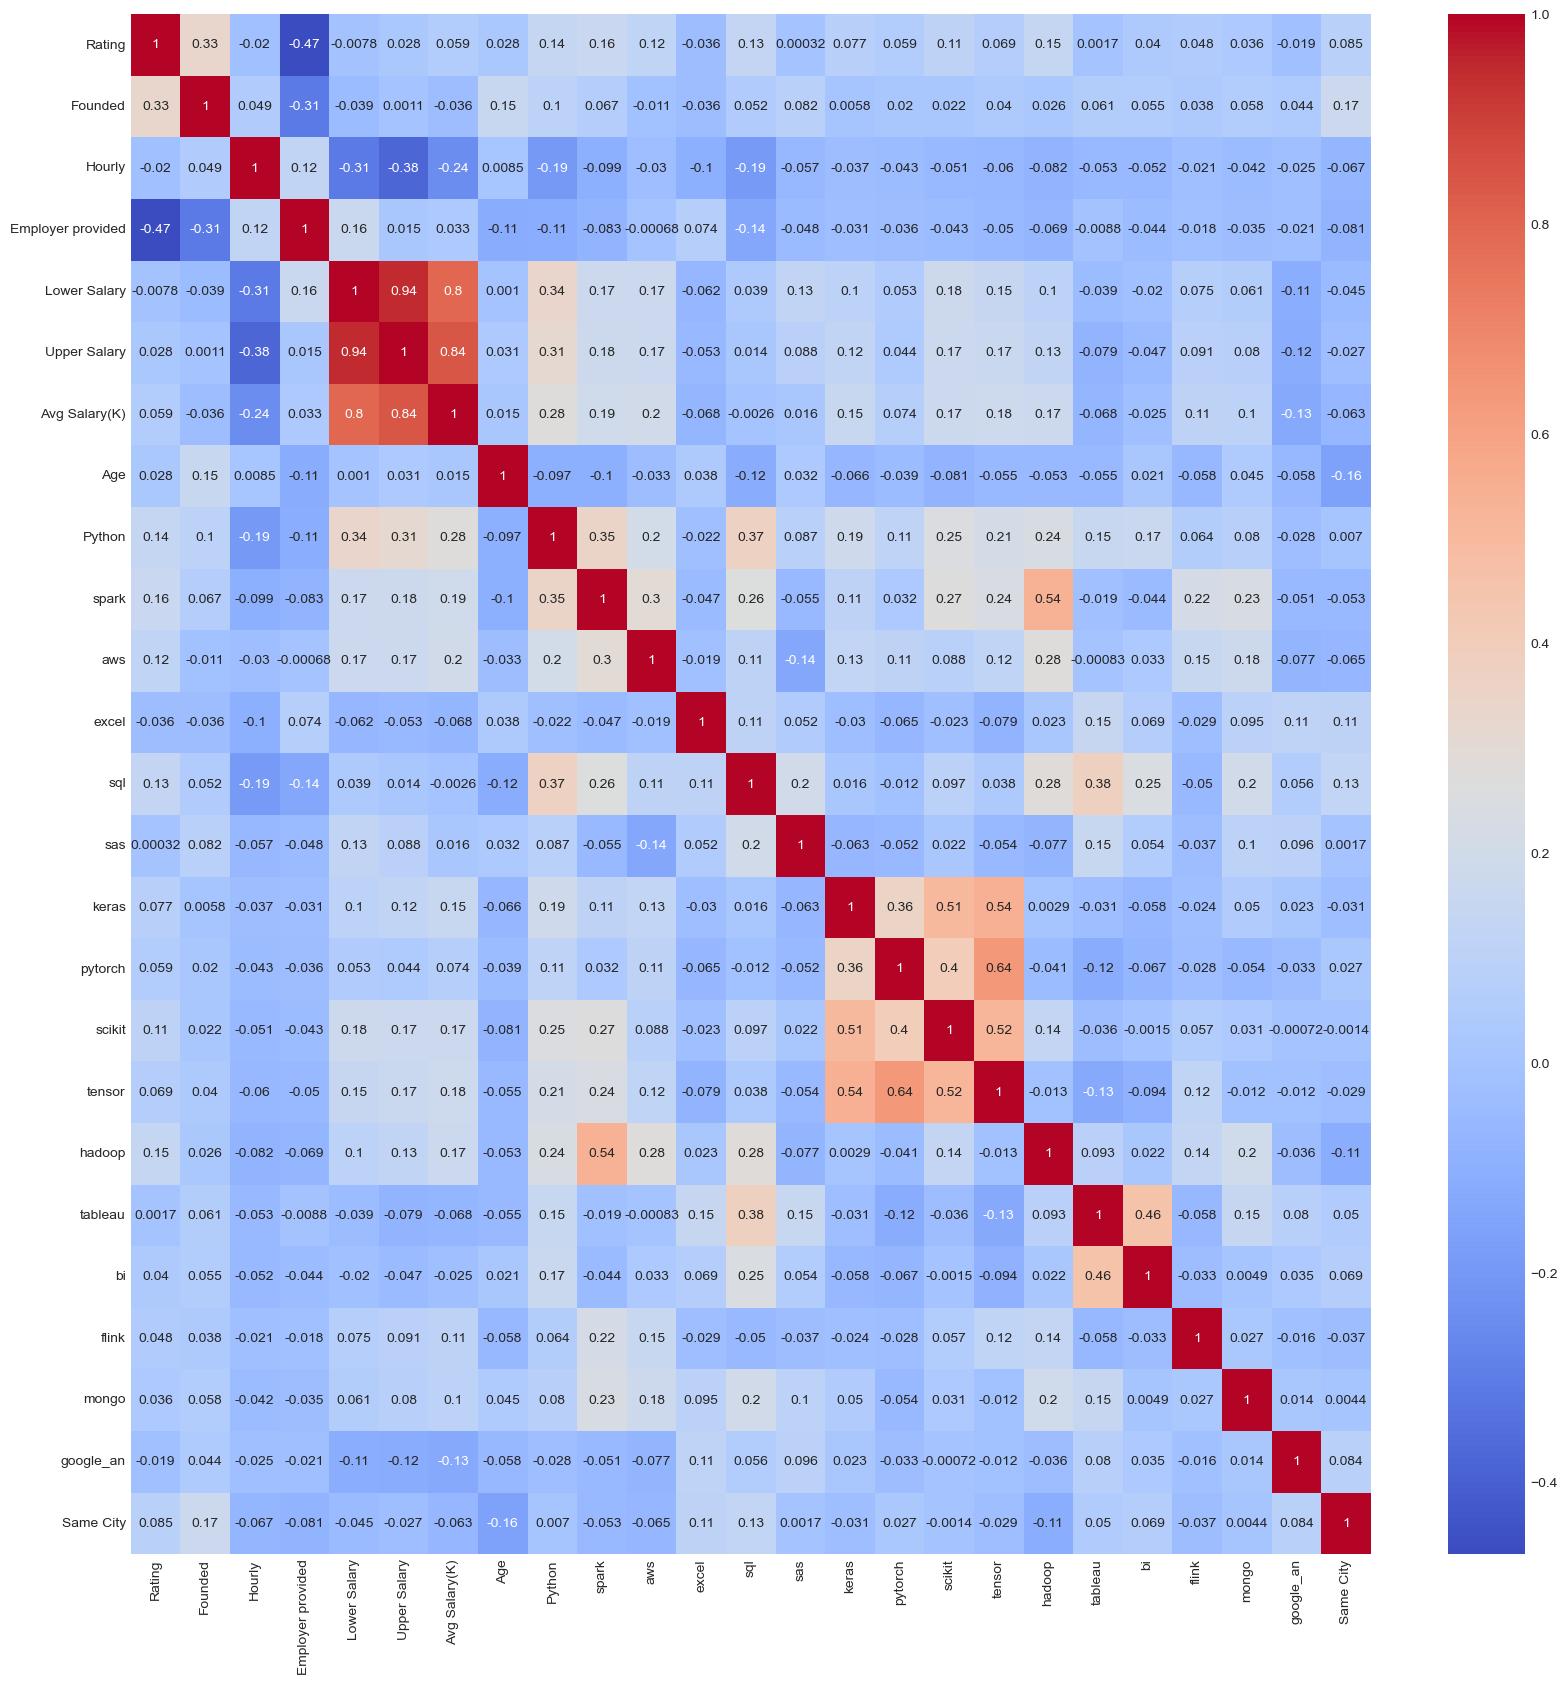

In [83]:
corr_matrix = num_col_df.corr()


plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.show()

**Nhận xét**

## **2.3 Câu hỏi để khám phá dữ liệu**

### **2.3.1 Câu hỏi 1.** Mối tương quan giữa top 5 kĩ năng, công cụ được đòi hỏi cho công việc được nhiều người thành thạo nhất so với mức lương trung bình.

In [84]:
# Chọn ra các cột kỹ năng, công cụ
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

skills_counts = cleaned_df[skills_columns][cleaned_df[skills_columns] == 1].count()

top_5_skills = skills_counts.nlargest(5)

print(top_5_skills)

Python    392
excel     388
sql       380
aws       176
spark     167
dtype: int64


# **3. Câu hỏi ý nghĩa**

## **3.1 Câu hỏi 1: Số lượng công việc và lương trung bình của top 10 Bang ở Mỹ đang đứng đầu.** 

In [85]:
# Tổng số lượng công việc 
total_jobs = cleaned_df.shape[0]
print('- Tổng số lượng công việc:', total_jobs)

- Tổng số lượng công việc: 742


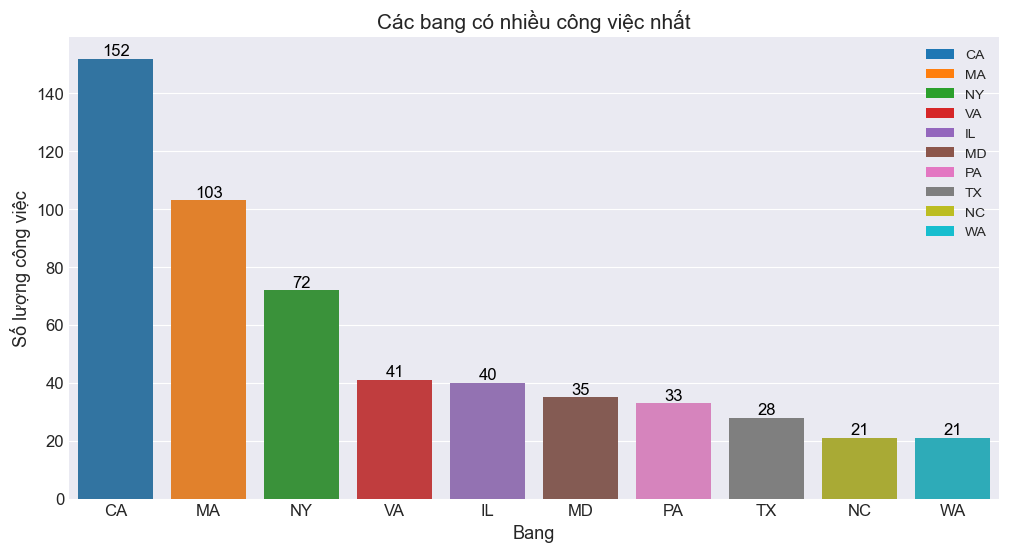

In [86]:
# Khởi tạo màu sắc từ bảng màu phổ biến
custom_palette = sns.color_palette("tab10")

# Lấy ra 10 bang có nhiều công việc nhất
top_10_states = cleaned_df["Job Location"].value_counts().index[:10]

# Tính toán số lượng công việc cho mỗi bang
job_counts = cleaned_df["Job Location"].value_counts().loc[top_10_states]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_states, y=job_counts, palette=custom_palette)

# Thêm label cho từng cột
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)

plt.title('Các bang có nhiều công việc nhất', fontsize=15)
plt.xlabel('Bang', fontsize=13)
plt.ylabel('Số lượng công việc', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tạo legend
patches = [plt.Rectangle((0,0),1,1,fc=custom_palette[i], edgecolor='none') for i in range(10)]
plt.legend(patches, cleaned_df["Job Location"].value_counts().index[0:10], loc="upper right")

sns.despine(bottom=False, left=False)

plt.show()

---------------------------------------------------------------------------------------------------------------------------------------


### **Phân tích:**
- California (CA) có số lượng công việc nhiều nhất.
- Massachusetts (MA) xếp thứ hai.
- New York (NY) xếp thứ ba .
- Virginia (VA) và Illinois (IL) số lượng công việc khá bằng nhau xếp thứ tư.
- Maryland (MD) và Pennsylvania (PA) cùng xếp thứ sáu.
- Các bang còn lại có số lượng công việc ít hơn 30.

### **Nhận xét:**
- California có nhiều việc làm nhất. Bởi vì California là trung tâm công nghệ của Mỹ tập trung các công ty lớn của thị trường công nghệ.
- Biểu đồ thể hiện một cách trực quan số lượng công việc tại các bang ở Hoa Kỳ.
- Các bang California, Massachusetts, New York, Virginia và Illinois có số lượng công việc cao nhất => Dễ thấy được là các bang trọng tâm của thị trường công nghệ.
- Massachusetts đứng ở vị trí thứ hai Vì theo chỉ số Công nghệ và Nhà nước của Viện Milken, bang này đã trở thành trung tâm công nghệ của Hoa Kỳ.
- Công ty Fortune 500 lớn nhất đặt trụ sở tại New York nhưng bang chỉ vẫn đứng ở vị trí thứ ba. Đây cũng là 1 điểm quan trọng để chúng ta thấy được điểm đặc trưng trong công nghệ.

### **Kết luận:**

- Biểu đồ số lượng công việc theo bang là một công cụ hữu ích để nắm bắt tình hình thị trường lao động tại Hoa Kỳ. 
- Biểu đồ này có thể được sử dụng cho mục đích nghiên cứu, học tập hoặc kinh doanh.

### Tại sao biểu đồ cột lại phù hợp: 
- Biểu đồ được trình bày rõ ràng, dễ hiểu.
- Màu sắc được sử dụng hợp lý, giúp phân biệt các bang dễ dàng.
- Các chú thích được đặt đúng vị trí và kích thước, dễ đọc.
- Cung cấp thông tin hữu ích về số lượng công việc tại các bang ở Hoa Kỳ.

**=> Có thể sử dụng biểu đồ này để so sánh số lượng công việc giữa các bang, hoặc để đánh giá tiềm năng kinh tế của từng bang.**


---------------------------------------------------------------------------------------------------------------------------------------


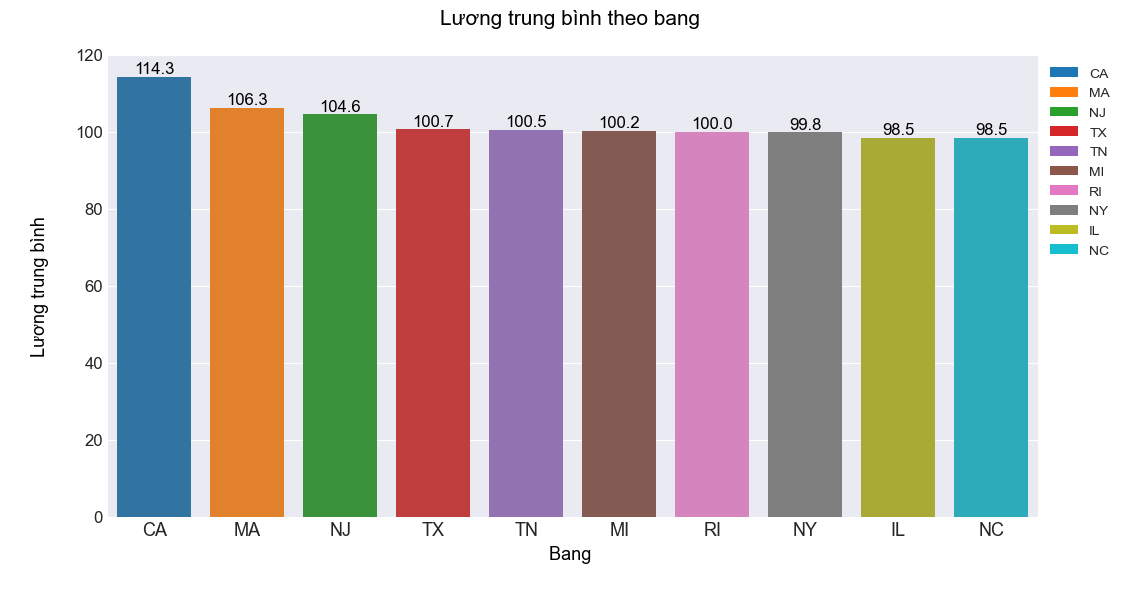

In [87]:
# Khởi tạo màu sắc từ bảng màu phổ biến
custom_palette = sns.color_palette("tab10")

# Lấy ra 10 bang có nhiều công việc nhất
sorter = cleaned_df.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)[0:10]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorter.index, y=sorter, palette=custom_palette)

# Hiển thị giá trị trên cột
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)
    
plt.title('Lương trung bình theo bang \n', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('Bang \n', fontsize=13, color='black')
plt.ylabel('\n Lương trung bình \n', fontsize=13, color='black')

# Tạo legend
patches = [plt.Rectangle((0,0),1,1,fc=custom_palette[i], edgecolor='none') for i in range(10)]
plt.legend(patches, sorter.index, loc="upper left", bbox_to_anchor=(1, 1))

sns.despine(bottom=False, left=False)

plt.show()


---------------------------------------------------------------------------------------------------------------------------------------


### **Phân tích:**
- California (CA) có mức lương trung bình cao nhất.
- Massachusetts (MA) xếp thứ hai.
- New Jersey (NJ) xếp thứ ba.
- Các bang còn lại có mức lương trung bình thấp hơn xấp xỉ 100 USD.

### **Nhận xét:**
- Biểu đồ thể hiện một cách trực quan mức lương trung bình theo bang ở Hoa Kỳ.
- C bang California, Massachusetts, New Jersey có mức lương trung bình top cao nhất.
- Biểu đồ cũng cho thấy sự chênh lệch mức lương giữa các bang.

### **Kết luận:**
- Biểu đồ lương trung bình theo bang là một công cụ hữu ích để nắm bắt tình hình mức lương tại Hoa Kỳ.
- Sử dụng biểu đồ này để so sánh mức lương giữa các bang hoặc để đánh giá mức sống tại từng bang.

### **Tại sao biểu đồ cột lại phù hợp:** 
- Biểu đồ được trình bày rõ ràng, dễ hiểu.
- Màu sắc được sử dụng hợp lý, giúp phân biệt các bang dễ dàng.
- Các chú thích được đặt đúng vị trí và kích thước, dễ đọc.
- Cung cấp thông tin hữu ích về mức lương trung bình theo bang ở Hoa Kỳ.

=> Có thể sử dụng biểu đồ này để so sánh mức lương giữa các bang hoặc để đánh giá tiềm năng kinh tế của từng bang.

---------------------------------------------------------------------------------------------------------------------------------------


# **Lợi ích của hai biểu đồ cho doanh nghiệp trong dự án phân tích dữ liệu**

## **1. Hiểu rõ thị trường lao động:**

- **Số lượng công việc:** Giúp xác định khu vực có nhu cầu tuyển dụng cao tập trung nguồn lực tuyển dụng và mở rộng thị trường.
- **Mức lương trung bình:** Đưa ra mức lương cạnh tranh phù hợp với từng khu vực thu hút nhân tài và tối ưu hóa chi phí nhân sự.

## **2. Hỗ trợ ra quyết định chiến lược:**

- **Lựa chọn địa điểm kinh doanh:** Khu vực có nguồn nhân lực phù hợp chi phí hợp lý và tiềm năng thị trường tốt.
- **Lập kế hoạch tuyển dụng:** Xác định số lượng nhân viên kỹ năng và mức lương phù hợp cho từng khu vực.

=> **Doanh nghiệp công nghệ:** Thuê nhân viên lập trình viên tại khu vực có nguồn nhân lực chất lượng cao.


---------------------------------------------------------------------------------------------------------------------------------------


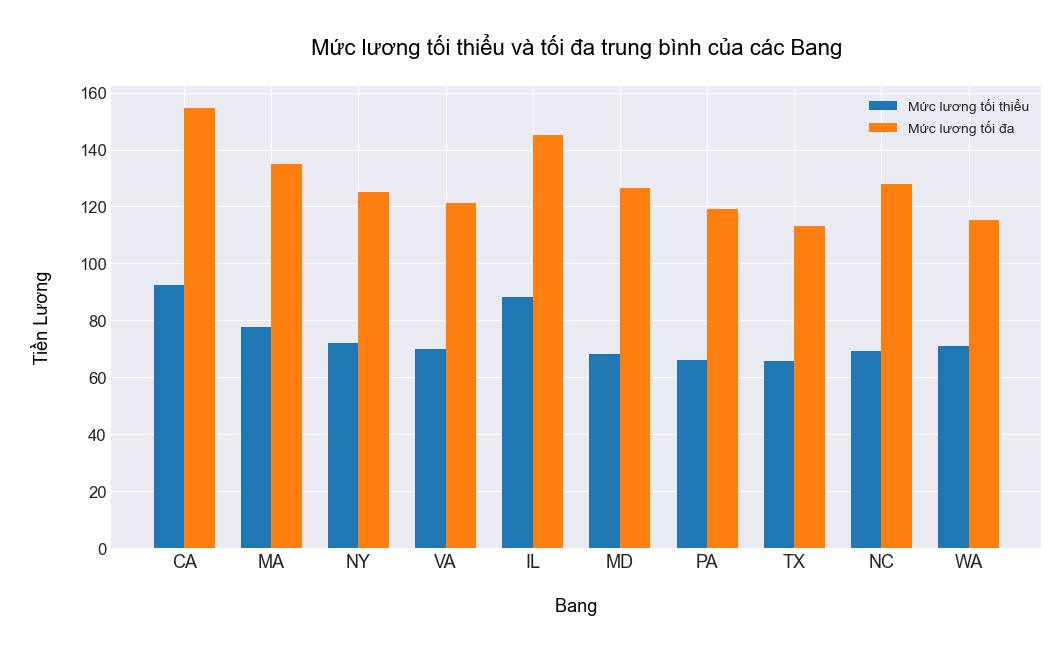

In [88]:
# Tính toán lương trung bình tối thiểu và tối đa theo địa điểm công việc
mean_salary_by_location = cleaned_df.groupby("Job Location")["Lower Salary", "Upper Salary"].mean().reset_index()

# Sắp xếp lại dữ liệu theo thứ tự của sorter
sorter = cleaned_df["Job Location"].value_counts().index
mean_salary_by_location["Job Location"] = mean_salary_by_location["Job Location"].astype("category")
mean_salary_by_location["Job Location"].cat.set_categories(sorter, inplace=True)
mean_salary_by_location = mean_salary_by_location.sort_values(["Job Location"]).reset_index().drop("index", axis=1)

# Lấy ra danh sách các bang cho nhãn trục x và biểu đồ
top_10_locations = sorter[0:10]
x = np.arange(len(top_10_locations))  # Vị trí của các nhãn trên trục x
width = 0.35  # Độ rộng của các cột

# Tạo subplot và vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, mean_salary_by_location["Lower Salary"][0:10], width, label='Mức lương tối thiểu')
rects2 = ax.bar(x + width/2, mean_salary_by_location["Upper Salary"][0:10], width, label='Mức lương tối đa')

# Thêm tiêu đề và chú thích
plt.title('\n Mức lương tối thiểu và tối đa trung bình của các Bang \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Bang \n', fontsize=13, color='black')
plt.ylabel('\n Tiền Lương \n', fontsize=13, color='black')

# Đặt các nhãn và chú thích trên trục x
ax.set_xticks(x)
ax.set_xticklabels(top_10_locations)
ax.legend()

# Hiển thị biểu đồ
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------


## **Nhận xét:**

- Biểu đồ thể hiện một cách trực quan mức lương tối thiểu và mức lương tối đa trung bình theo bang ở Hoa Kỳ.
- Biểu đồ cũng cho thấy sự chênh lệch mức lương giữa các bang.

## **Kết luận:**

- Biểu đồ mức lương tối thiểu và mức lương tối đa trung bình theo bang là một công cụ hữu ích để nắm bắt tình hình mức lương tại Hoa Kỳ. Biểu đồ này có thể được sử dụng cho mục đích nghiên cứu, học tập hoặc kinh doanh.
- Sử dụng biểu đồ này để so sánh mức lương giữa các bang hoặc để đánh giá mức sống tại từng bang.

=> Đây là biểu đồ giúp có cái nhìn tổng quan hơn về mức lương của các tiểu bang ở Mỹ và thể hiện rõ được sự trên lệch lương.

---------------------------------------------------------------------------------------------------------------------------------------


- #### **Phần bên dưới sẽ giúp thấy được các mức lương trung bình của các tiểu Bang sẽ bị ảnh hưởng như thế nào nếu số lượng công việc lương cao.**

In [89]:
# Tạo bảng pivot để đếm số lượng công việc theo vị trí và chức danh công việc
pivot_table = pd.pivot_table(cleaned_df, index=['Job Location', 'job_title_sim'], values='Avg Salary(K)', aggfunc='count').sort_values('Job Location', ascending=True)

pivot_table

Avg Salary(K)
Job Location job_title_sim                 
AL           analyst                      4
             data engineer                1
             data scientist               1
             na                           1
             other scientist              1
...                                     ...
WA           data scientist              17
             other scientist              1
WI           data scientist               3
             analyst                      3
             other scientist              4

[123 rows x 1 columns]

- California (CA) có mức lương trung bình cao có thể là do có 74 số lượng công việc ở California dành cho data scientist có lương cao và Massachusetts (MA) có mức lương trung bình cao có thể là do có 37 số lượng công việc dành cho data scientist và 39 số lượng công việc dành other scientist có lương cao.
- Các tiểu bang có mức lương trung bình thấp có thể cũng do số lượng công việc trong bộ data ít, lương thấp và công việc cũng được phân bổ giữa các chức danh lương cao và lương thấp.nên dẫn tới việc lương trung bình thấp.

---------------------------------------------------------------------------------------------------------------------------------------


## **3.2 Câu hỏi 2: Phân loại các công ty theo các nhóm kích thước để xem lương trung bình của các nhóm phát triển như thế nào ở năm 2021?** 

In [90]:
cleaned_df.reset_index(drop=True, inplace=True)

In [91]:
cleaned_df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [92]:
cleaned_df.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Same City
0,Data Scientist,53-91,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,0
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,data scientist,na,M,0


In [93]:
cleaned_df_copy = cleaned_df.copy()

# Thêm cột mới "Job City" và "Job State"
cleaned_df_copy["Job City"] = cleaned_df_copy["Location"].apply(lambda x: str(x).upper().split(',')[0].strip())
cleaned_df_copy["Job State"] = cleaned_df_copy["Location"].apply(lambda x: str(x).upper().split(',')[1].strip())


In [94]:
cleaned_df_copy.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Same City,Job City,Job State
0,Data Scientist,53-91,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,1,0,0,0,data scientist,na,M,0,ALBUQUERQUE,NM
1,Healthcare Data Scientist,63-112,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,data scientist,na,M,0,LINTHICUM,MD


In [95]:
cleaned_df_copy['Avg Month Salary(K)'] = cleaned_df_copy['Avg Salary(K)'].apply(lambda x: round(x/12,2))

In [96]:
cleaned_df_copy['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [97]:
def define_company_size(x,y):
    revenue = x.lower()
    headcount = y.lower()
    mapper = {
        '$10+ billion (usd)': 'LARGE',
        '$5 to $10 billion (usd)': 'LARGE',
        '$1 to $2 billion (usd)': 'LARGE',
        '$2 to $5 billion (usd)': 'LARGE',
        '$500 million to $1 billion (usd)': 'LARGE',
        '$100 to $500 million (usd)': 'MEDIUM',
        '$50 to $100 million (usd)':  'MEDIUM',
        '$25 to $50 million (usd)': 'MEDIUM',
        '$10 to $25 million (usd)': 'SMALL',
        '$5 to $10 million (usd)': 'SMALL',
        '$1 to $5 million (usd)': 'SMALL',
        'less than $1 million (usd)': 'MICRO'
    }
    classification = 'Unknown' if  ('unknow' in revenue or 'unknow' in headcount) else mapper[revenue]
    return classification

In [98]:
cleaned_df_copy['Company Size'] = cleaned_df_copy[['Revenue','Size']].apply(lambda x: define_company_size(x["Revenue"],x["Size"]), axis =1)

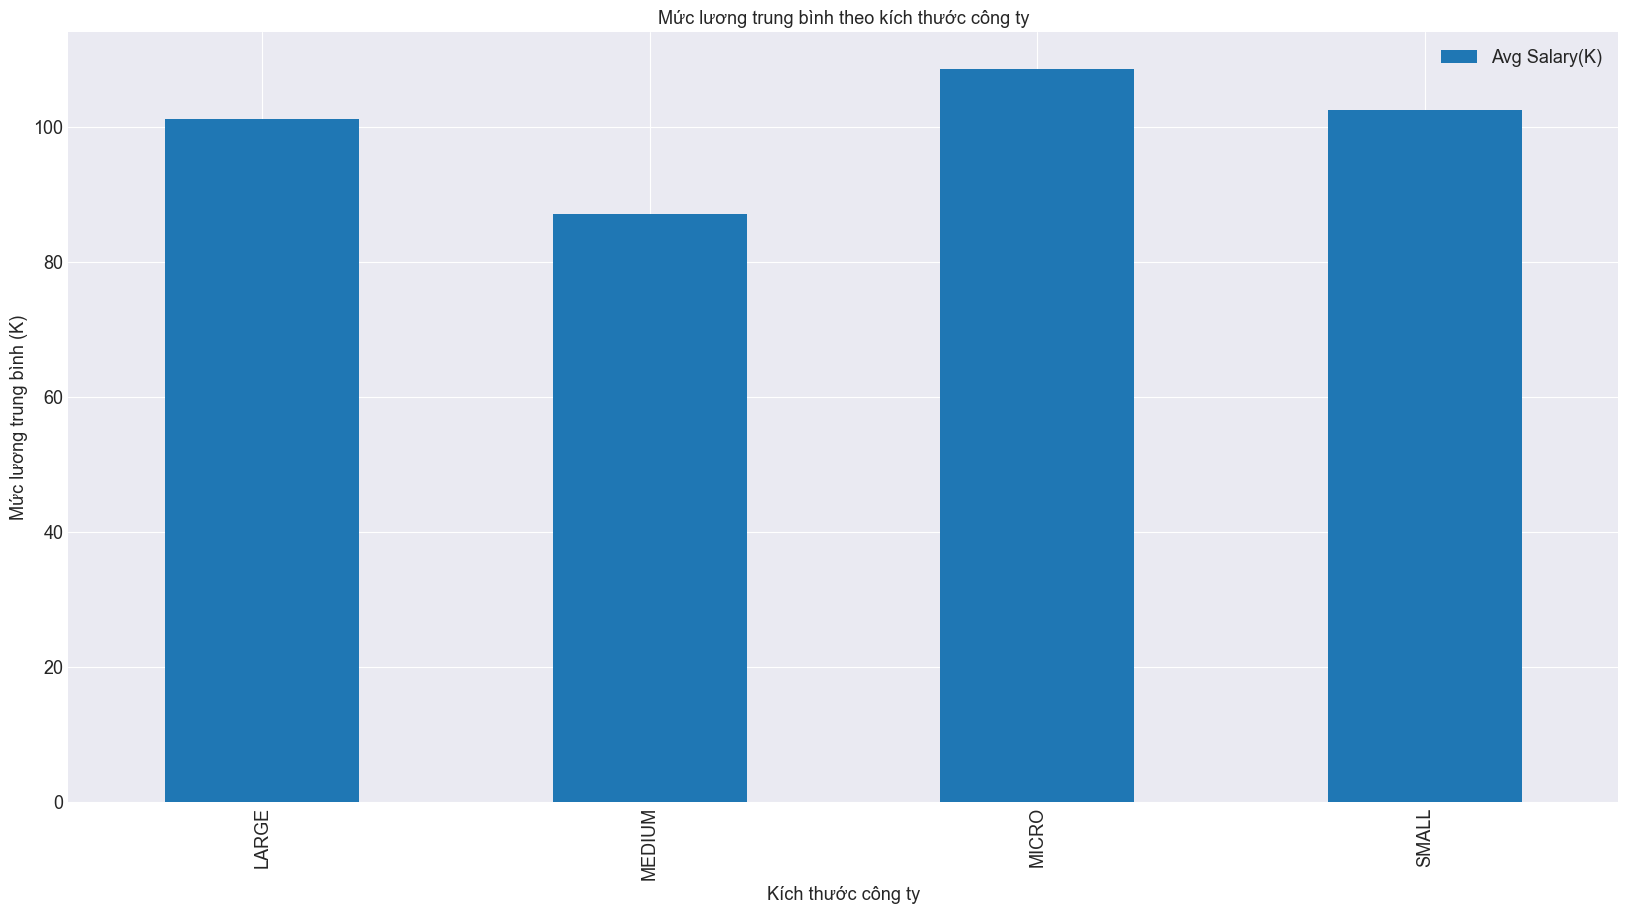

In [99]:
mean_salary_company_size = cleaned_df_copy[['Company Size','Avg Salary(K)']].groupby('Company Size').mean().iloc[:4]
ax=mean_salary_company_size.plot(kind='bar',figsize=(20,10))
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title('Mức lương trung bình theo kích thước công ty', fontsize=13)
plt.xlabel('Kích thước công ty', fontsize=13)
plt.ylabel('Mức lương trung bình (K)', fontsize=13)
# hiện chú thích
plt.legend(fontsize=13)

plt.show()


In [100]:
cleaned_df_copy['Company Size'].value_counts()

LARGE      299
Unknown    204
MEDIUM     177
SMALL       58
MICRO        4
Name: Company Size, dtype: int64

In [101]:
mean_salary_company_size.sort_values('Avg Salary(K)', ascending = False)

,Avg Salary(K)
Company Size,
MICRO,108.625000
SMALL,102.519484
LARGE,101.253378
MEDIUM,87.210509


---------------------------------------------------------------------------------------------------------------------------------------


### **Nhận xét:**
- Ta có thể thấy mức lương của MICRO cao nhất nhưng nhưng song song đó cũng bị ảnh hưởng bởi số lượng nên dẫn tới mức lương có thể sai lệch.
- Còn 3 giá trị của nhóm công ty khác có vẻ mức lương khá ổn định theo đúng thực tế.

## **Kết luận:**
- Biểu đồ mức lương theo quy mô công ty là một công cụ hữu ích để nắm bắt tình hình mức lương tại Hoa Kỳ. 
- Sử dụng biểu đồ này để so sánh mức lương giữa các quy mô công ty hoặc để đánh giá tiềm năng thu nhập khi làm việc tại các công ty có quy mô khác nhau.
- Giúp nhà tuyển dụng nắm bắt được mức lương để tuyển dụng và xây dựng công ty theo quy mô đang phát triển mà có lợi nhuận và nguồn nhân lực tiềm năng.

---------------------------------------------------------------------------------------------------------------------------------------


## **3.3 Câu hỏi 3: Phân loại các công ty tư nhân và chính phủ thì mức lương sẽ như thế nào?** 

In [102]:
# Tạo một DataFrame mới với cột 'Type of ownership' và 'Avg Salary(K)'
salary_by_ownership_df = cleaned_df_copy[['Type of ownership', 'Avg Salary(K)']].copy(deep=True)

# Nhóm theo loại sở hữu và tính giá trị trung bình mức lương
mean_salary_by_ownership_df = salary_by_ownership_df.groupby('Type of ownership').mean()

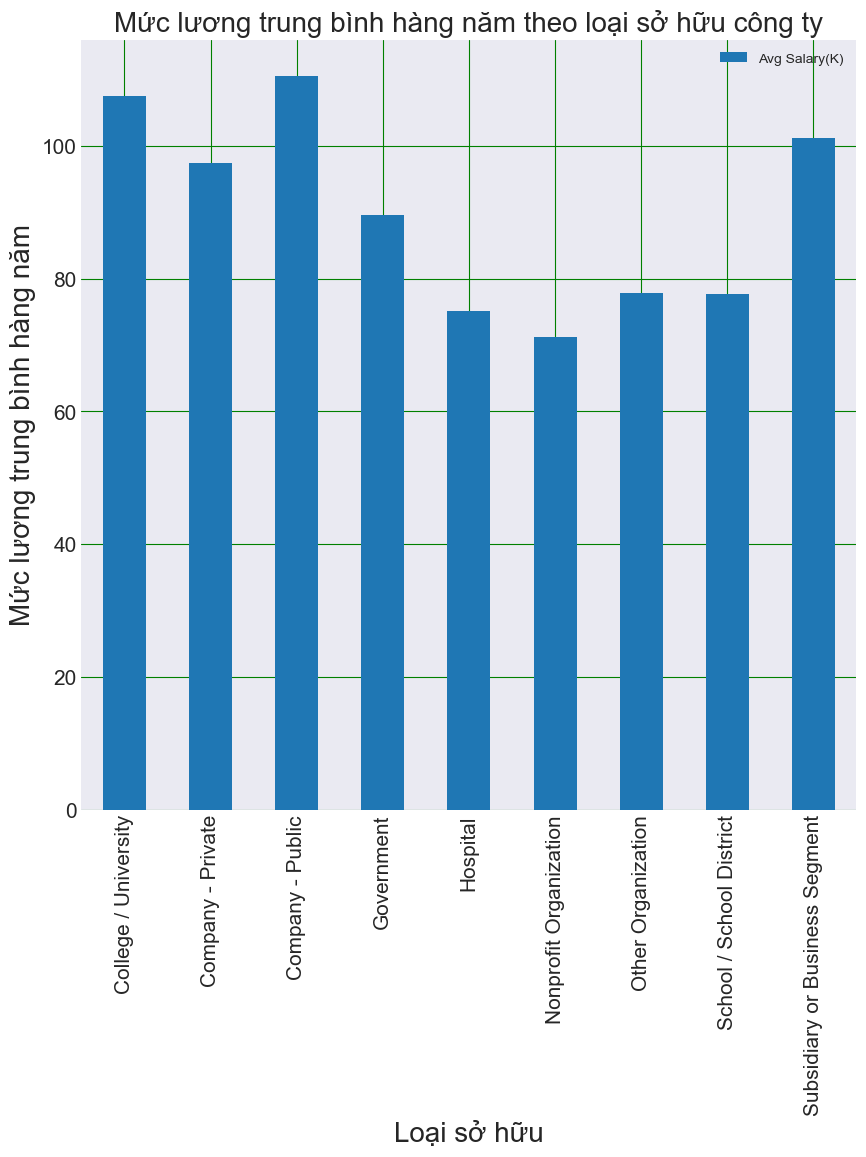

In [103]:
ax = mean_salary_by_ownership_df.plot(kind='bar', figsize=(10,10))
plt.title("Mức lương trung bình hàng năm theo loại sở hữu công ty", fontsize=20)
plt.ylabel("Mức lương trung bình hàng năm", fontsize=20)
plt.xlabel("Loại sở hữu", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(True, color='green')

---------------------------------------------------------------------------------------------------------------------------------------


### **Nhận xét:**
- Từ biểu đồ trên ta thấy được các cột trong biểu đồ có khác nhiều loại nhưng chỉ có Company - Private và Government đã xác định rõ về vấn đề cầu hỏi vừa đặt ra nên ta sẽ lấy 2 loại đó để tiếp tục phân tích câu hỏi.


---------------------------------------------------------------------------------------------------------------------------------------


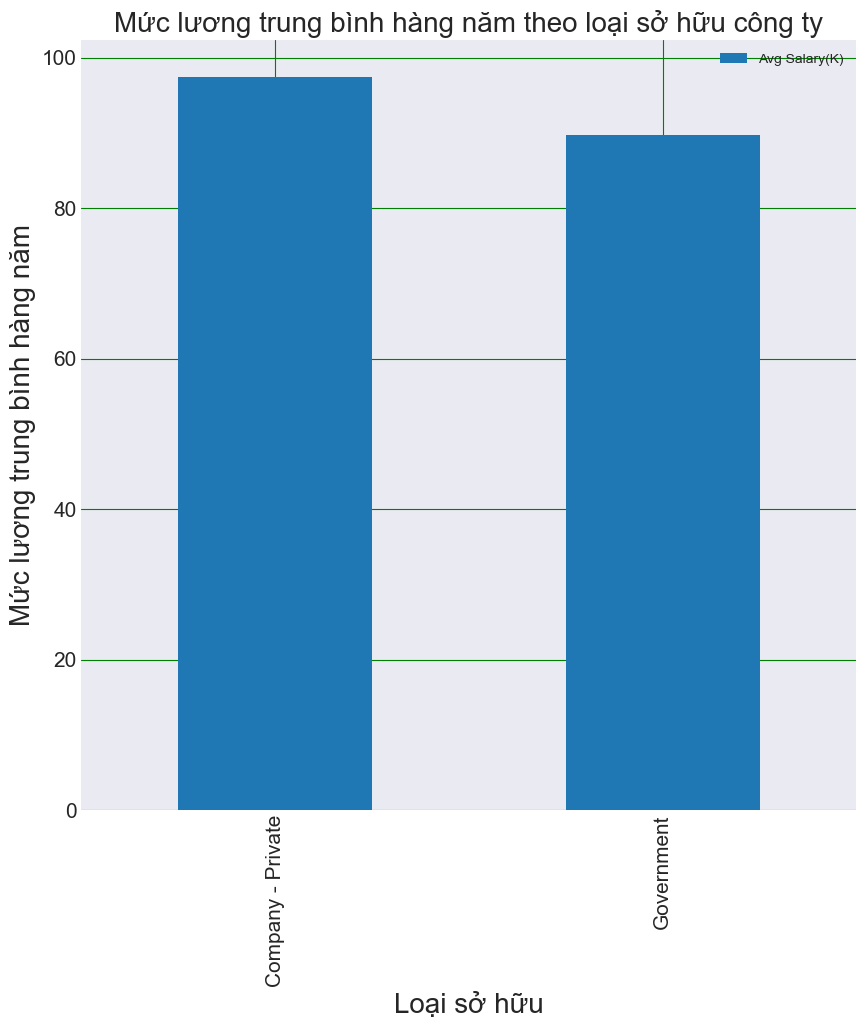

In [104]:
# Hiển thị biểu đồ của Company - Private và Government
ax = mean_salary_by_ownership_df.loc[['Company - Private','Government']].plot(kind='bar', figsize=(10,10))
plt.title("Mức lương trung bình hàng năm theo loại sở hữu công ty", fontsize=20)
plt.ylabel("Mức lương trung bình hàng năm", fontsize=20)
plt.xlabel("Loại sở hữu", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(True, color='green')

In [105]:
# Tạo DataFrame mới chứa thông tin về loại sở hữu và đánh giá
satisfaction_by_ownership_df = cleaned_df_copy[['Type of ownership', 'Rating']].copy()

# Nhóm theo loại sở hữu và tính giá trị trung bình của đánh giá
avg_satisfaction_by_ownership_df = satisfaction_by_ownership_df.groupby('Type of ownership').mean()

# Chọn ra chỉ thông tin về đánh giá của các công ty tư nhân và chính phủ
avg_satisfaction_by_ownership_df = avg_satisfaction_by_ownership_df.loc[['Company - Private','Government']]

In [106]:
avg_satisfaction_by_ownership_df

,Rating
Type of ownership,
Company - Private,3.648293
Government,3.626667


---------------------------------------------------------------------------------------------------------------------------------------


### **Nhận xét:**
- Ta thấy dựa vào Rating thì không có sự đánh giá cao hay nổi trội hơn từ bất cứ loại hình nào nên ta có thể suy ra 1 điều là mối tương quan của mức lương và sự hài lòng của nhân viên có mối tương quan yếu.

---------------------------------------------------------------------------------------------------------------------------------------


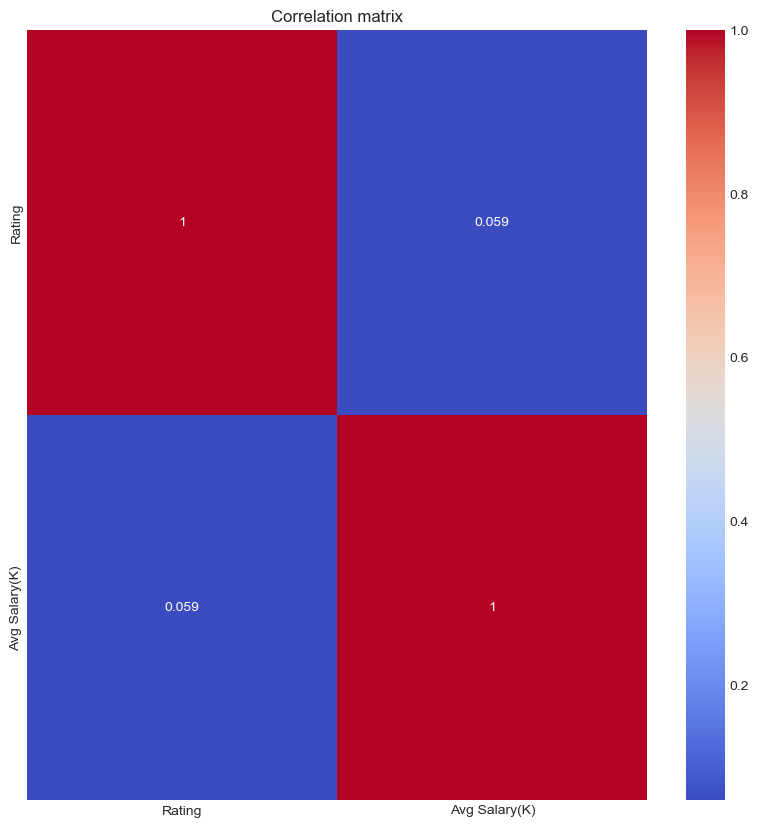

In [107]:
corr_analysis_df = cleaned_df[['Type of ownership', 'Rating','Avg Salary(K)']].copy(deep=True)
# vẽ biểu đồ correlation
plt.figure(figsize=(10, 10))
sns.heatmap(corr_analysis_df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation matrix')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------


- ## **Biểu đồ tròn cho thấy ngành đang được quan tâm đến nhất trong năm 2021?**

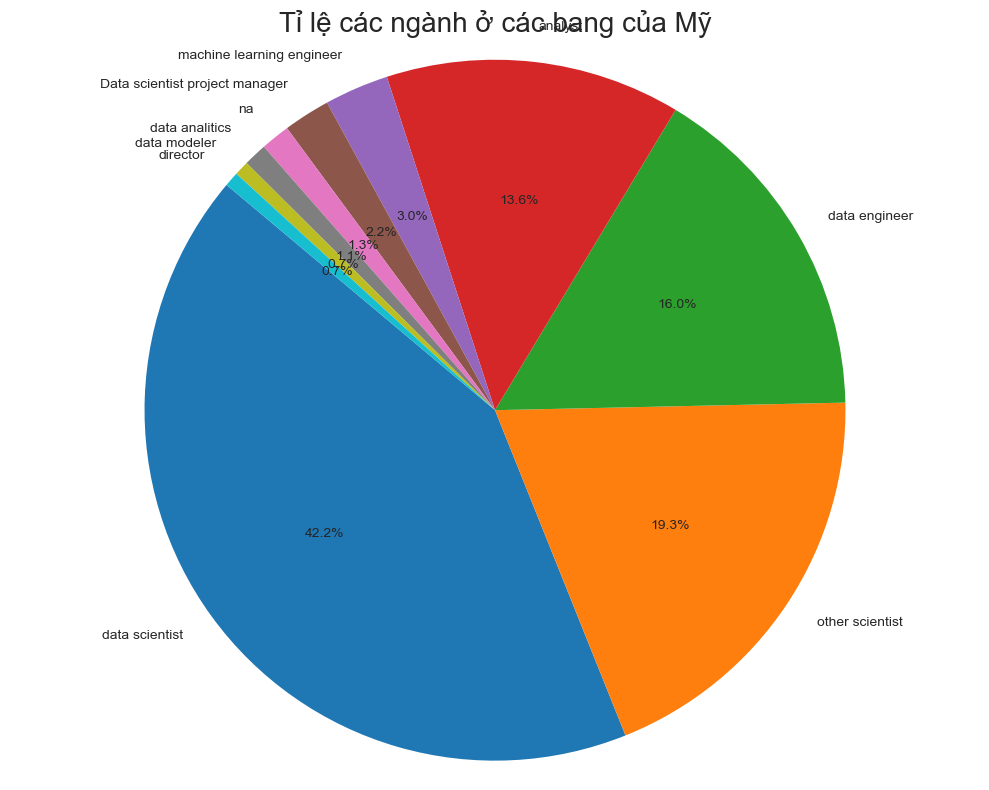

In [108]:
# Thiết lập kích thước và phong cách
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-darkgrid')

# Vẽ biểu đồ tròn
cleaned_df_copy['job_title_sim'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))

# Thiết lập tiêu đề và nhãn
plt.title('Tỉ lệ các ngành ở các bang của Mỹ', fontsize=20)
plt.ylabel('')

# Hiển thị biểu đồ
plt.axis('equal')  # Đảm bảo hình tròn
plt.tight_layout()  # Đảm bảo không bị cắt bớt
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------


### **Nhận xét:**
- Từ biểu đồ trên ta sẽ có thể thấy ngành Khoa học dữ liệu đang chiếm tỷ lệ gần 50% trên các chuyên ngành khác. 

=> Nên từ đó chúng em sẽ khám phá tới mức lương của chuyên ngành Khoa học dữ liệu để hiểu rõ hơn về mức lương và tại sao tại thời điểm 2021 này ngành Khoa học dữ liệu đang được quan tâm và tìm hiểu nhiều nhất.

## **Kết luận:**

- Biểu đồ tròn giúp thấy được rõ ngành Khoa học dữ liệu chiếm tỷ lệ cao trong toàn bộ về mảng Dữ liệu.
- Giúp nhà tuyển dụng biết được nhu cầu cũng như số lượng tuyển dụng của các công ty năm 2021 đang đánh mạnh vào mảng nào của Dữ liệu từ đó đưa ra các chiến lược để cạnh tranh với các công ty khác.

---------------------------------------------------------------------------------------------------------------------------------------


## **3.3 Câu hỏi 4: Phân bố từng khoảng lương của ngành Khoa học dữ liệu tại năm 2021?** 

In [109]:
# Tạo DataFrame mới chứa thông tin về loại sở hữu và mức lương
cleaned_df_copy['Frequency'] = 1
# Nhóm theo loại sở hữu và tính giá trị trung bình của mức lương
salary_range_groups = cleaned_df_copy[['job_title_sim', 'Avg Salary(K)','Frequency']].groupby(['job_title_sim','Avg Salary(K)']).sum()

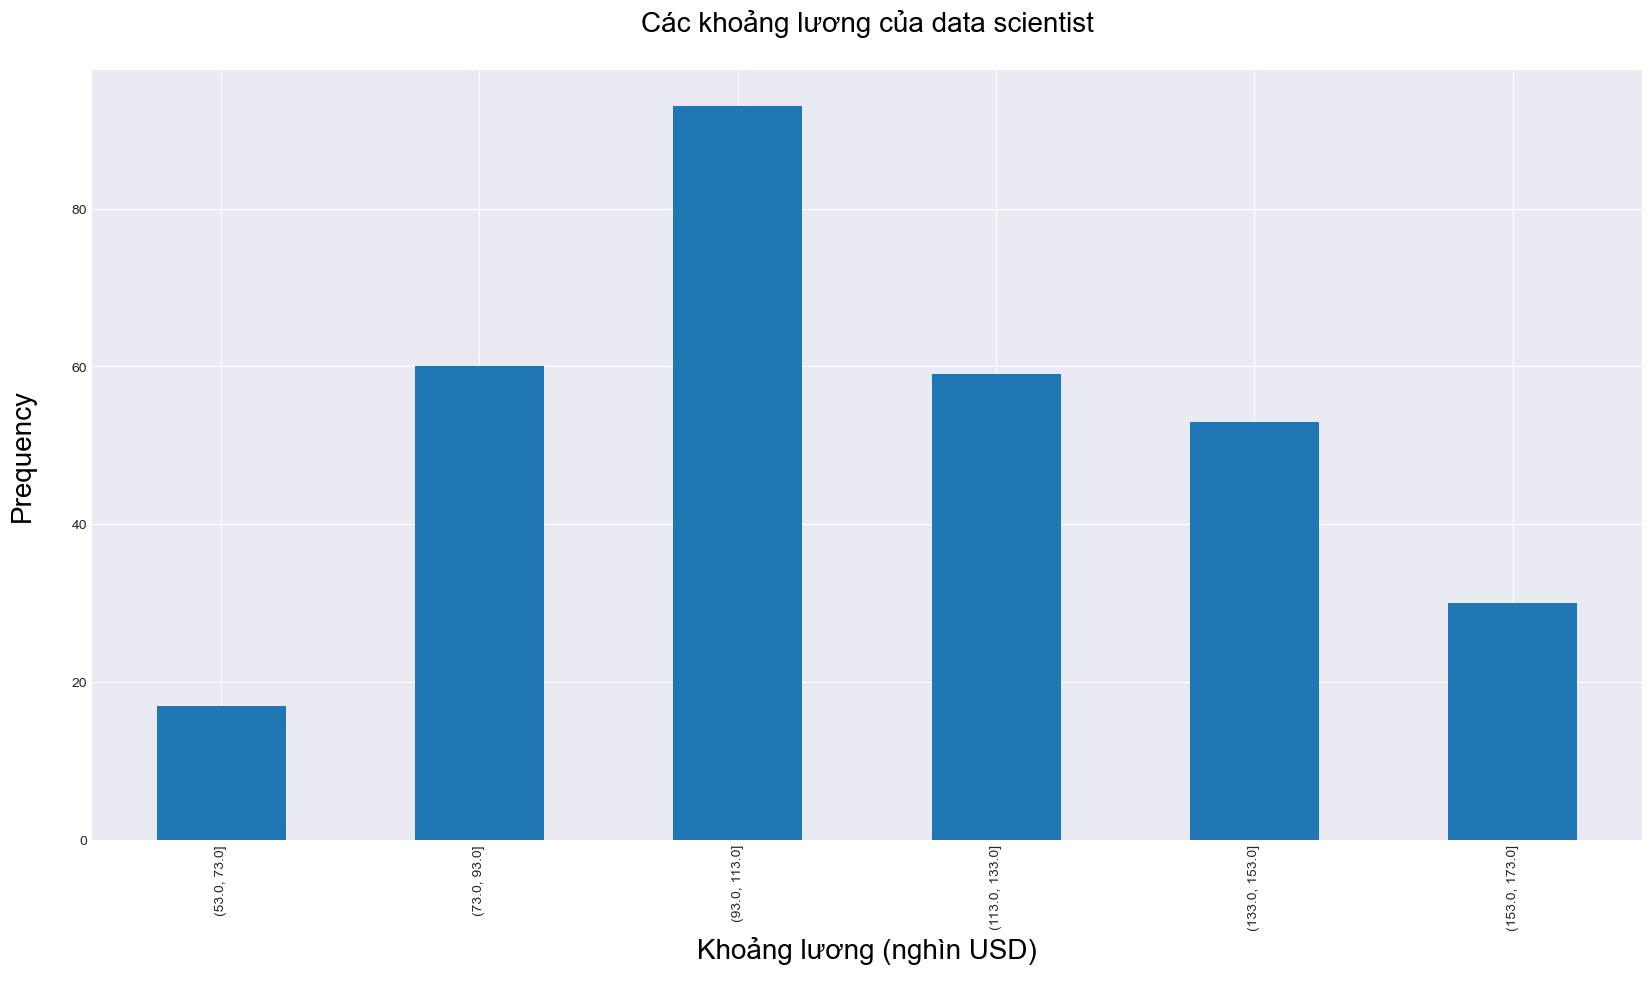

In [110]:
# Lấy dữ liệu cho nhóm data scientist
data_scientist_df = cleaned_df_copy[cleaned_df_copy['job_title_sim'] == 'data scientist']

# Tính toán các khoảng lương
salary_range_length = 20
min_salary = data_scientist_df['Avg Salary(K)'].min()  
max_salary = data_scientist_df['Avg Salary(K)'].max()
salary_ranges = pd.cut(data_scientist_df['Avg Salary(K)'], bins=np.arange(min_salary, max_salary + salary_range_length, salary_range_length))

# Tạo DataFrame mới với khoảng lương và số lượng tương ứng
data_scientist_salary_range = pd.DataFrame({'Salary Range': salary_ranges, 'Frequency': 1})
data_scientist_salary_range = data_scientist_salary_range.groupby('Salary Range').sum()

# Vẽ biểu đồ
data_scientist_salary_range['Frequency'].plot(kind='bar', figsize=(20, 10))
plt.title('Các khoảng lương của data scientist\n', fontsize=20, color='black')
plt.xlabel('Khoảng lương (nghìn USD)\n', fontsize=20, color='black')
plt.ylabel('Prequency\n', fontsize=20, color='black')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------


### **Nhận xét:**
- Ta có thể thấy mức lương trung bình phổ biến cho ngành Khoa học dữ liệu nằm trong khoảng 93-113USD.
- Và các mức lương thấp từ 53-73USD chiếm phần nhỏ nhất đây có thể là mức lương dành cho các intern vừa vào công ty.

## **Kết luận:**
- Biểu đồ này cho ta thấy được mức lương trung bình của ngành Khoa học dữ liệu phổ biến nhất ở Mỹ nằm trong khoảng nào giúp ta xác định được định hướng phát triển khi bước chân vào môi trường làm việc của ngành Khoa học dữ liệu.


---------------------------------------------------------------------------------------------------------------------------------------
